In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

/home/stephen/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# ubuntu 16.04
# Terminal, run 
# pip install lightgbm
# pip install xgboost
# pip install sklearn

# Mac OS
# Terminal, run 
# pip install lightgbm
# pip install xgboost
# pip install sklearn

In [0]:
# Random Forest Parameters
RFC_METRIC = 'gini'
NUM_ESTIMATORS = 100
NO_JOBS = 4

#Train, Test, Validation datasets
VALID_SIZE  = 0.2
NUMBER_KFOLDS = 5
RANDOM_STATE = 2000

#LightGBM, XGBOOST
MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50


In [0]:
data_df = pd.read_csv('/home/stephen/bittiger/week02/CreditCardFraud/data/creditcard.csv')

In [0]:
data_df.shape

(284807, 31)

In [0]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# Data Distribution
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
# Check Missing Data
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum() / data_df.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


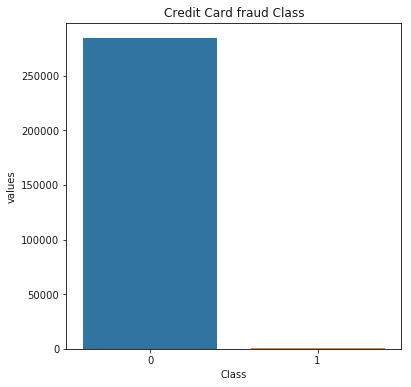

In [0]:
# Data Unbalance

temp = data_df['Class'].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})
plt.figure(figsize = (6, 6))
plt.title('Credit Card fraud Class')
sns.set_color_codes('pastel')
sns.barplot(x = 'Class', y = 'values', data = df)
locs, labels = plt.xticks()
plt.show()

In [0]:
#Class 1 : 492 , 0.172%

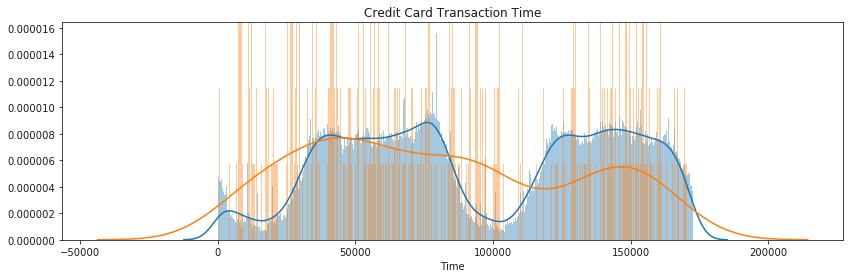

In [0]:
class_0 = data_df.loc[data_df['Class'] == 0]['Time']
class_1 = data_df.loc[data_df['Class'] == 1]['Time']
plt.figure(figsize = (14, 4))
plt.title('Credit Card Transaction Time')
sns.set_color_codes('pastel')
sns.distplot(class_0, kde = True, bins = 480)
sns.distplot(class_1, kde = True, bins = 480)
plt.show()

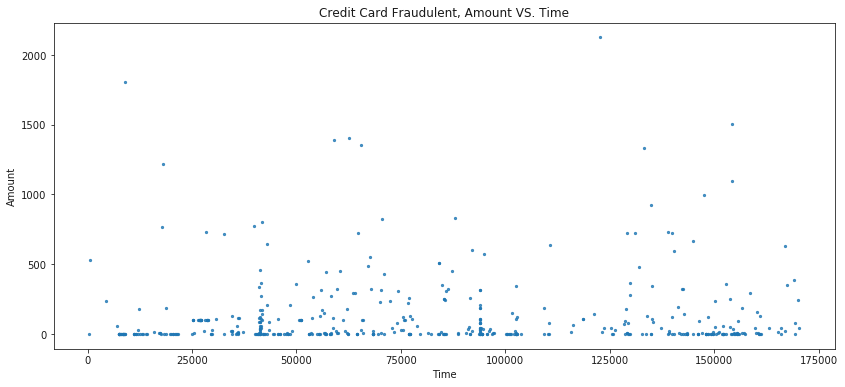

In [0]:
fraud = data_df.loc[data_df['Class'] == 1]
f, ax = plt.subplots(figsize = (14, 6))
s = sns.regplot(x = 'Time', y = 'Amount', data = fraud, fit_reg = False, ax = ax, scatter_kws = {'s' : 5})
plt.title('Credit Card Fraudulent, Amount VS. Time')
plt.show()
                                                                                            

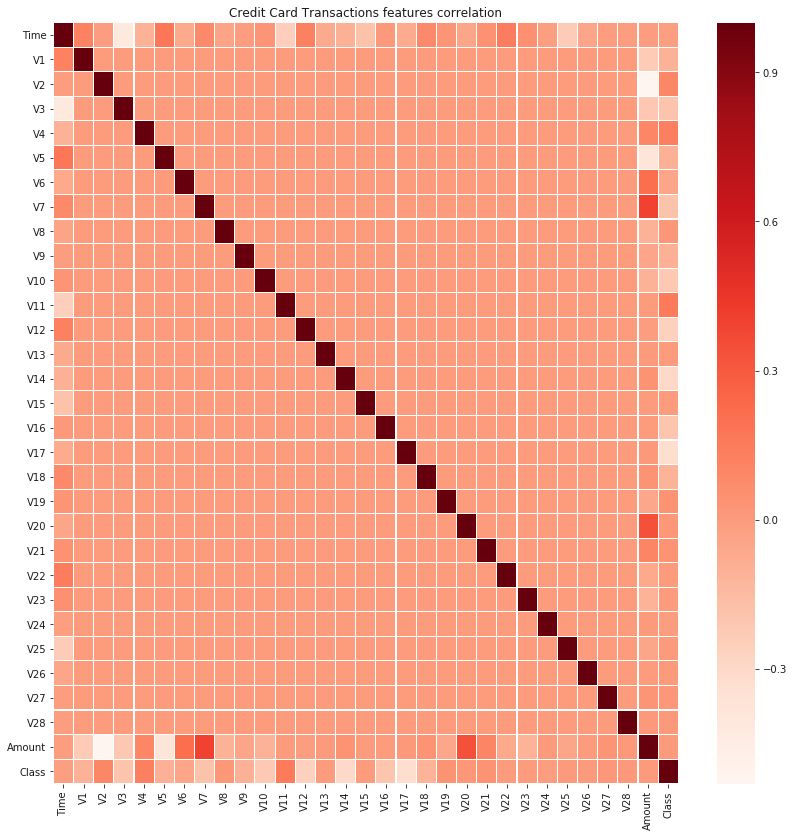

In [0]:
# Features Correlation

plt.figure(figsize = (14, 14))
plt.title('Credit Card Transactions features correlation')
corr = data_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, cmap ='Reds')
plt.show()

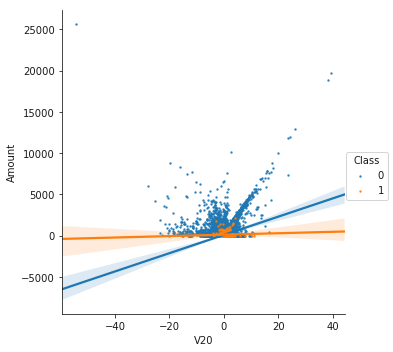

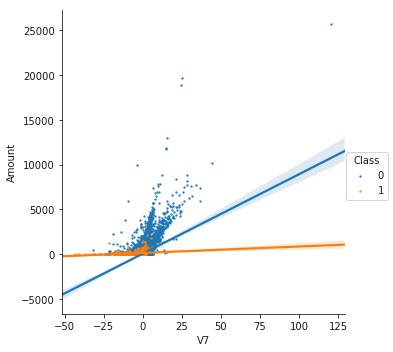

In [0]:
s = sns.lmplot(x = 'V20', y = 'Amount', data = data_df, hue = 'Class', fit_reg = True, scatter_kws = {'s' : 2})
s = sns.lmplot(x = 'V7',  y = 'Amount', data = data_df, hue = 'Class', fit_reg = True, scatter_kws = {'s' : 2})
plt.show()

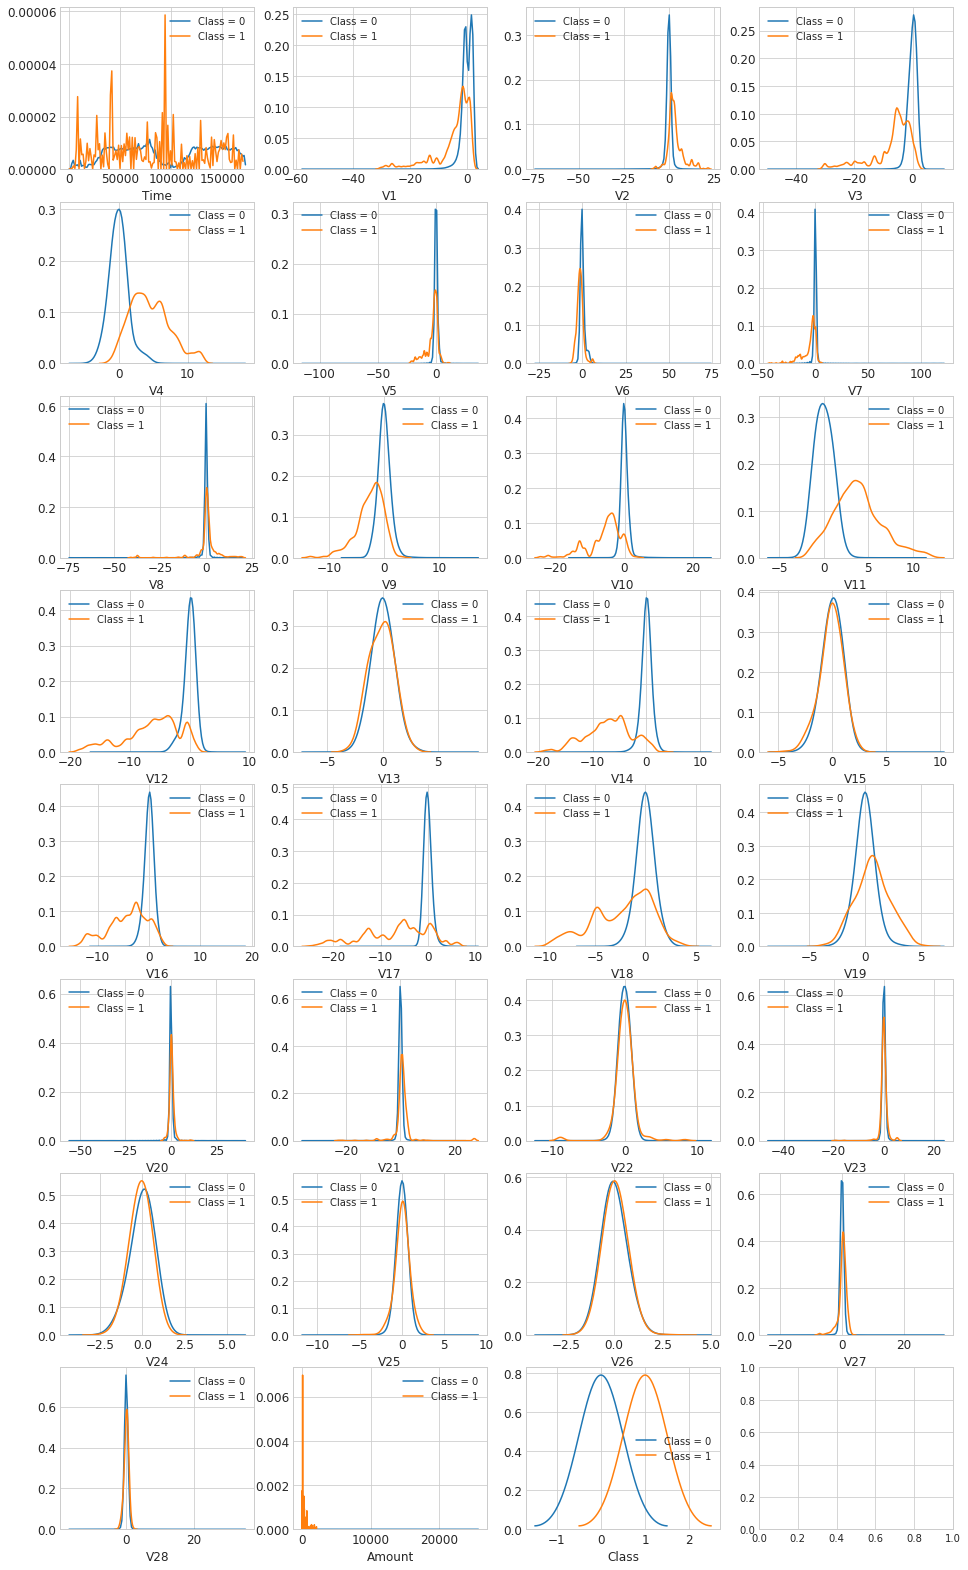

In [0]:
# Feature Density Plot
var = data_df.columns.values
i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28))

for feature in var:
    i += 1
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], bw = 0.5, label = 'Class = 0')
    sns.kdeplot(t1[feature], bw = 0.5, label = 'Class = 1')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

In [0]:
#Prediction
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [0]:
#Train, Validation
train_df, val_df = train_test_split(data_df, test_size = VALID_SIZE, random_state = RANDOM_STATE, shuffle = True)

In [0]:
train_df.shape

(227845, 31)

In [0]:
val_df.shape

(56962, 31)

In [0]:
#Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
c_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
for c_param in c_param_range:
    print('------------------------')
    print('C parameter: ', c_param)
    print('------------------------')
    print(' ')
    lr = LogisticRegression(C = c_param, penalty = 'l1')
    lr.fit(train_df[predictors], train_df[target].values)
    preds = lr.predict(val_df[predictors])
    recall_acc_lr = recall_score(val_df[target].values, preds)
    print('Logistic Regression - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

------------------------
C parameter:  0.001
------------------------
 
Logistic Regression - roc_auc_score:  0.689057351192
------------------------
C parameter:  0.01
------------------------
 
Logistic Regression - roc_auc_score:  0.770226324271
------------------------
C parameter:  0.1
------------------------
 
Logistic Regression - roc_auc_score:  0.817514832369
------------------------
C parameter:  1
------------------------
 
Logistic Regression - roc_auc_score:  0.817523621568
------------------------
C parameter:  10
------------------------
 
Logistic Regression - roc_auc_score:  0.817523621568
------------------------
C parameter:  100
------------------------
 
Logistic Regression - roc_auc_score:  0.817523621568


In [0]:
#Naive Bayse
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_df[predictors], train_df[target].values)
preds = bnb.predict(val_df[predictors])
print('BNB - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

BNB - roc_auc_score:  0.783704680985


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_df[predictors], train_df[target].values)
preds = gnb.predict(val_df[predictors])
print('GNB - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

GNB - roc_auc_score:  0.807585174473


In [0]:
#Random Forest 
rf_clf = RandomForestClassifier(n_jobs = NO_JOBS, random_state = RANDOM_STATE, criterion = 'gini', 
                                n_estimators = NUM_ESTIMATORS, verbose = False)
rf_clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2000, verbose=False,
            warm_start=False)

In [0]:
preds = rf_clf.predict(val_df[predictors])
print('Random Forest - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

Random Forest - roc_auc_score:  0.858099318908


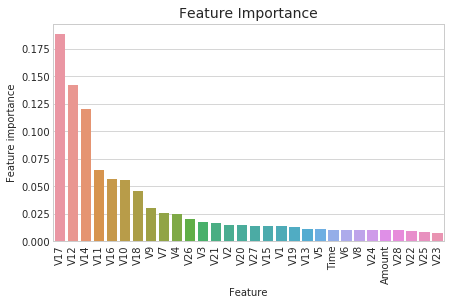

In [0]:
# Feature Importance
tmp = pd.DataFrame({'Feature' : predictors, 'Feature importance' : rf_clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
plt.figure(figsize = (7, 4))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

In [0]:
rf_clf.feature_importances_

array([ 0.01059774,  0.01337788,  0.01471521,  0.01715426,  0.02461065,
        0.01072393,  0.01050449,  0.02597686,  0.0104391 ,  0.03059388,
        0.05524363,  0.06502751,  0.14213502,  0.01079516,  0.12020366,
        0.01361046,  0.0567637 ,  0.18851273,  0.04612709,  0.01294693,
        0.01462047,  0.01654007,  0.00922598,  0.00712653,  0.0101242 ,
        0.00841587,  0.01996897,  0.01379026,  0.01002175,  0.01010602])

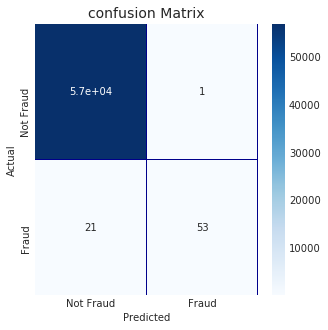

In [0]:
#Confusion Matrix
cm = pd.crosstab(val_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'], 
            annot = True, ax = ax1,
            linewidths = .2, linecolor = 'Darkblue', cmap ='Blues')
plt.title('confusion Matrix', fontsize = 14)
plt.show()


In [0]:
# XGBoost
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)
type(dtrain)

xgboost.core.DMatrix

In [0]:
# XGBoost Parameters
params = {}
params['objective'] = 'binary:logistic'
#params['objective'] = 'multi:softmax'
#params['objective'] = 'reg:linear'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [0]:
xgb_clf = xgb.train(params,
                   dtrain,
                   MAX_ROUNDS,
                   watchlist,
                   early_stopping_rounds = EARLY_STOP,
                   maximize = True,
                   verbose_eval = VERBOSE_EVAL)

[0]	train-auc:0.888592	valid-auc:0.817445
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.930382	valid-auc:0.884801
[100]	train-auc:0.939117	valid-auc:0.890235
[150]	train-auc:0.978002	valid-auc:0.970314
[200]	train-auc:0.988426	valid-auc:0.977776
[250]	train-auc:0.992028	valid-auc:0.982209
[300]	train-auc:0.993821	valid-auc:0.985412
[350]	train-auc:0.995084	valid-auc:0.986689
[400]	train-auc:0.996156	valid-auc:0.98612
Stopping. Best iteration:
[355]	train-auc:0.995188	valid-auc:0.986934



In [0]:
preds = xgb_clf.predict(dvalid)
print('XGBoost - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

XGBoost - roc_auc_score:  0.986346809473


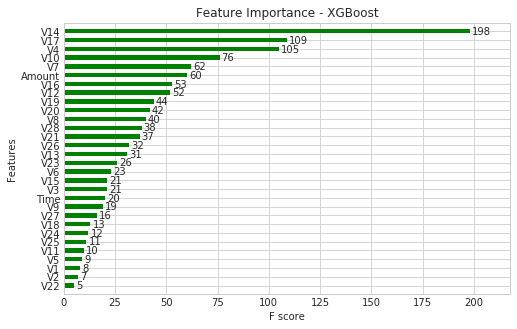

In [0]:
fig, ax = plt.subplots(ncols = 1, figsize = (8, 5))
xgb.plot_importance(xgb_clf, height = 0.5, title = 'Feature Importance - XGBoost', ax = ax, color = 'green')
plt.show()

In [0]:
#LightGBM
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [0]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label = train_df[target].values,
                     feature_name = predictors)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label = val_df[target].values,
                     feature_name = predictors)

In [0]:
type(dtrain)

lightgbm.basic.Dataset

In [0]:
evals_results = {}
lgb_clf = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid],
                   valid_names = ['train', 'valid'], evals_result = evals_results,
                   num_boost_round = MAX_ROUNDS, early_stopping_rounds = EARLY_STOP,
                   verbose_eval = VERBOSE_EVAL, feval = None)

Training until validation scores don't improve for 50 rounds.
[50]	train's auc: 0.994763	valid's auc: 0.978252
[100]	train's auc: 0.998646	valid's auc: 0.981715
[150]	train's auc: 0.999638	valid's auc: 0.984817
[200]	train's auc: 0.999798	valid's auc: 0.984567
Early stopping, best iteration is:
[184]	train's auc: 0.999768	valid's auc: 0.985098


In [0]:
preds = lgb_clf.predict(val_df[predictors].values)
print('LightGBM - roc_auc_acore: ', roc_auc_score(val_df[target].values, preds))

LightGBM - roc_auc_acore:  0.985097555367


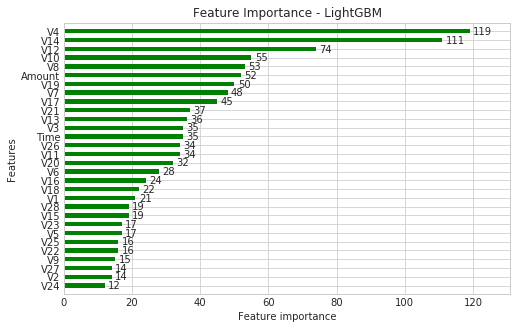

In [0]:
fig, ax = plt.subplots(ncols = 1, figsize = (8, 5))
lgb.plot_importance(lgb_clf, height = 0.5, title = 'Feature Importance - LightGBM', ax = ax, color = 'green')
plt.show()

In [0]:
#SVM Classification
svc = SVC(kernel = 'rbf', C = 2.0, gamma = 3)
svc.fit(train_df[predictors], train_df[target].values)
preds = svc.predict(val_df[predictors])
print('SVM - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))